In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import time, sys, os
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/Folds5x2_pp.csv'))
dataset.head()
dataset.info()
dataset.shape
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
dataset_dup = dataset.copy()
dataset_dup.info()
dataset_dup.head()
dataset_dup.shape
dataset_dup.describe()
print("Percentage of Null Values of dataset Features:")
round(100*(dataset_dup.isnull().sum()/len(dataset_dup)), 2).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
Percentage of Null Values of dataset Features:


AT    0.0
V     0.0
AP    0.0
RH    0.0
PE    0.0
dtype: float64

In [6]:
dataset_dup.drop_duplicates(subset = None, inplace = True)
print(dataset_dup.shape)
print(dataset.shape)

(9527, 5)
(9568, 5)


         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns] 0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64


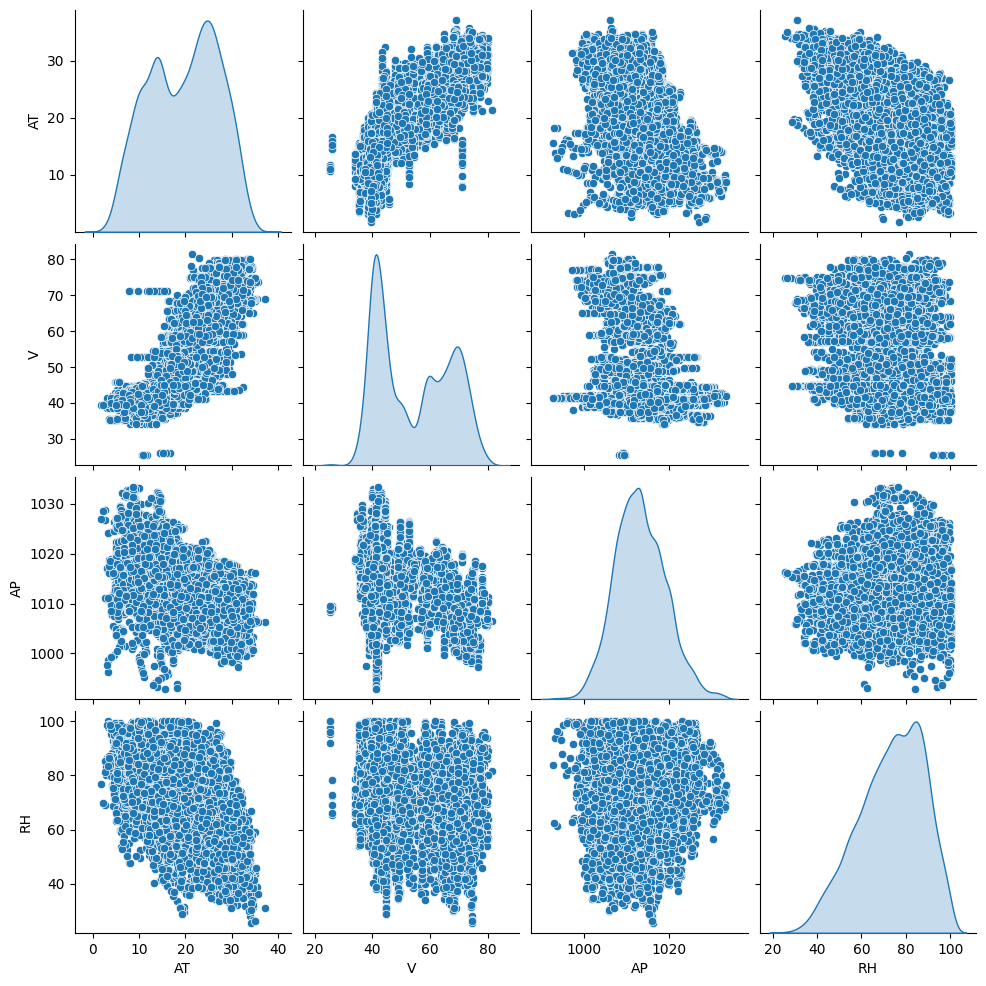

In [7]:
X = dataset[['AT', 'V', 'AP', 'RH']]
y = dataset['PE']

print(X, y)
X.head()
X.describe()
y.head()
y.describe()

sns.pairplot(X, diag_kind='kde')

         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9527 rows x 4 columns] 0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9527, dtype: float64


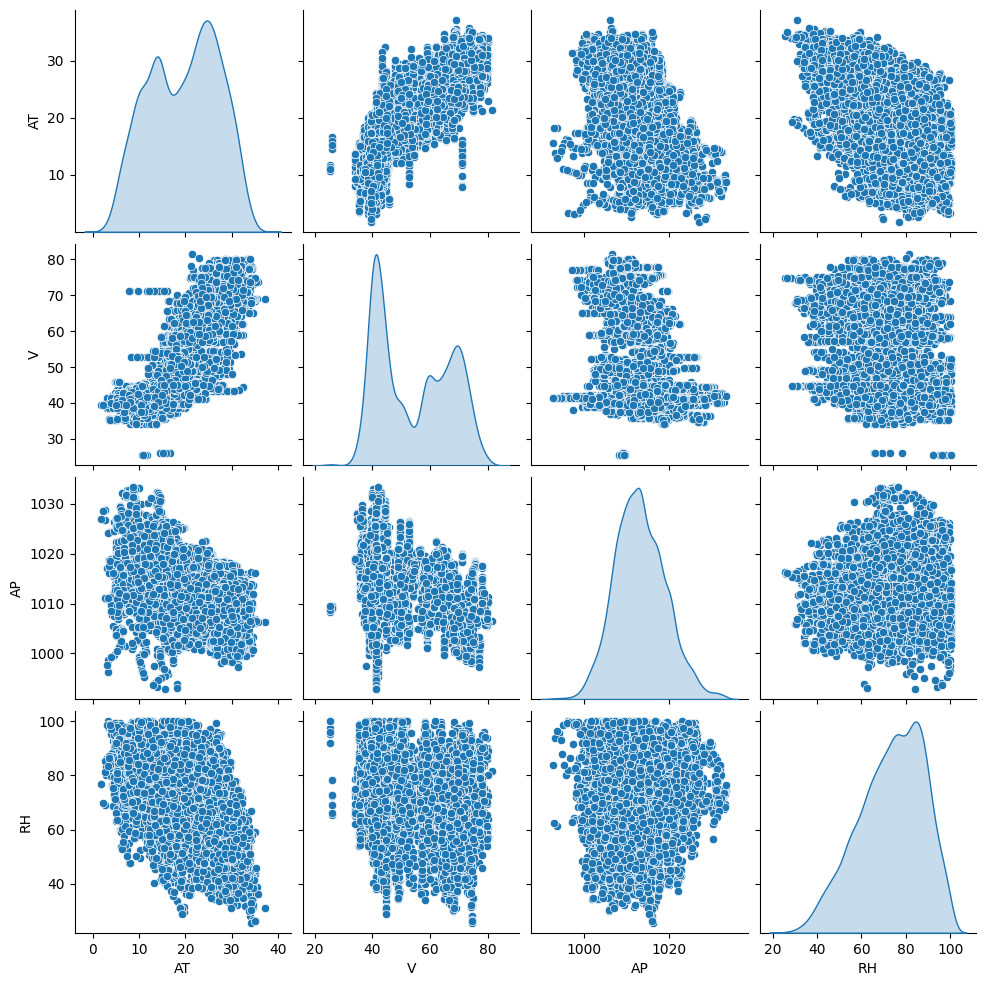

In [8]:
X_dup = dataset_dup[['AT', 'V', 'AP', 'RH']]
y_dup = dataset_dup['PE']

print(X_dup, y_dup)
X_dup.head()
X_dup.describe()
y_dup.head()
y_dup.describe()

sns.pairplot(X_dup, diag_kind='kde')

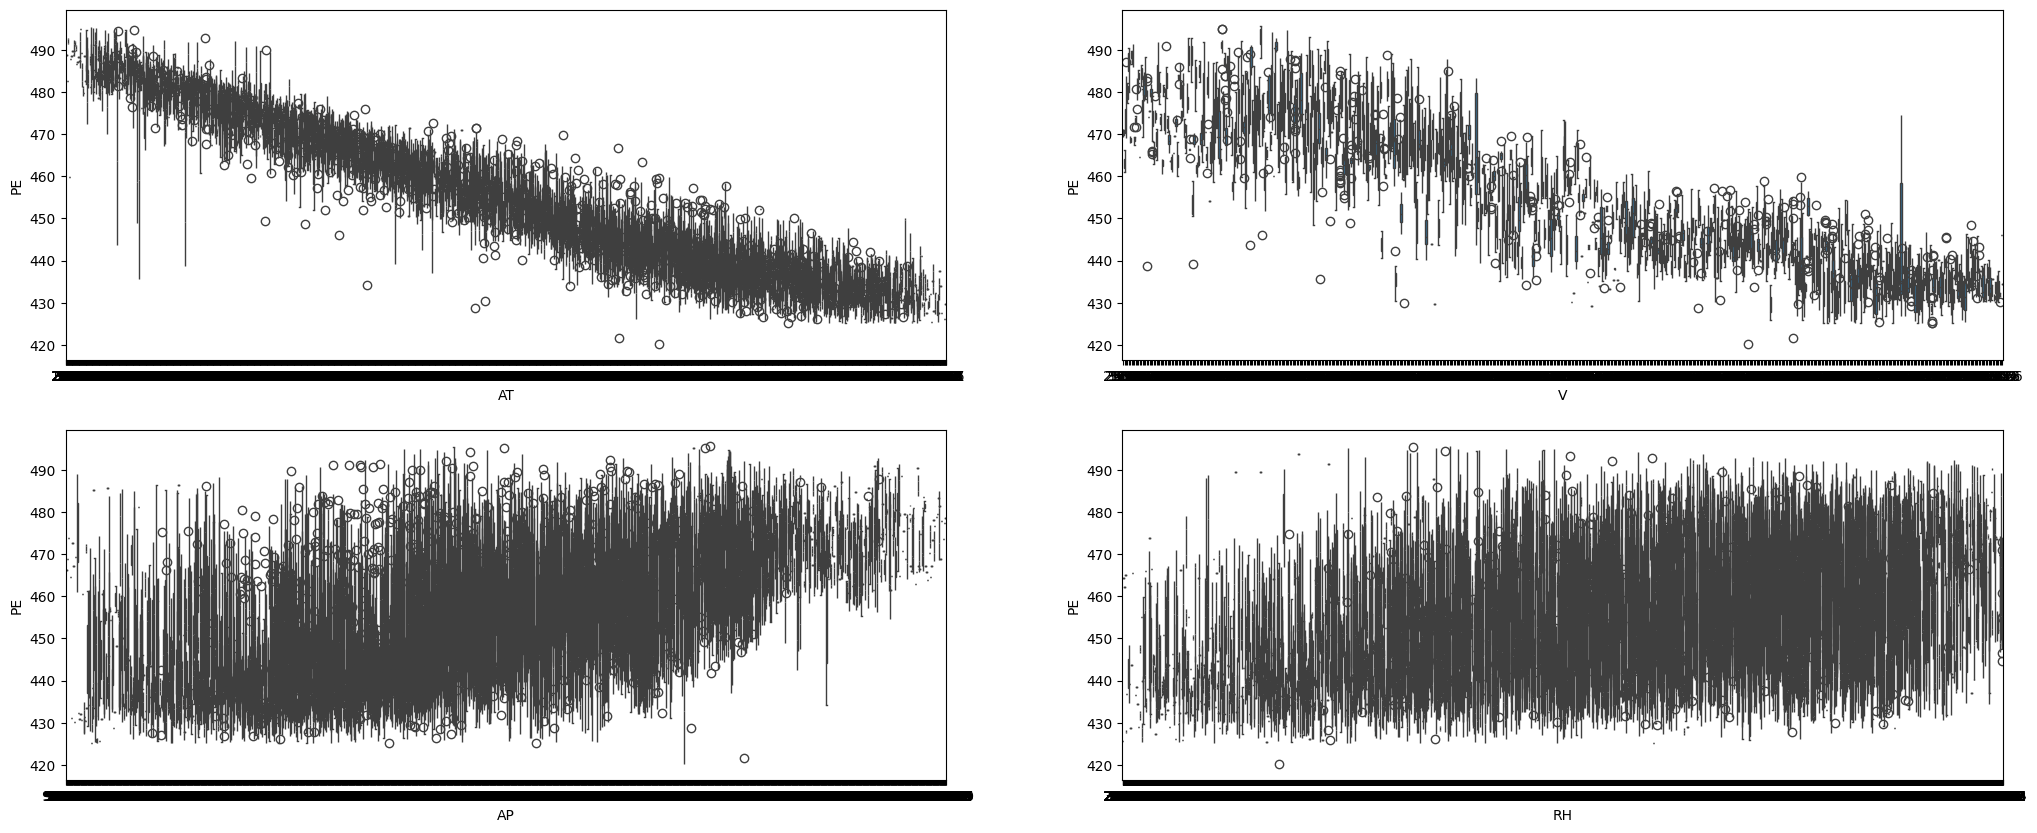

In [9]:
plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'AT', y = 'PE', data = dataset_dup)
plt.subplot(2,2,2)
sns.boxplot(x = 'V', y = 'PE', data = dataset_dup)
plt.subplot(2,2,3)
sns.boxplot(x = 'AP', y = 'PE', data = dataset_dup)
plt.subplot(2,2,4)
sns.boxplot(x = 'RH', y = 'PE', data = dataset_dup)
plt.show()

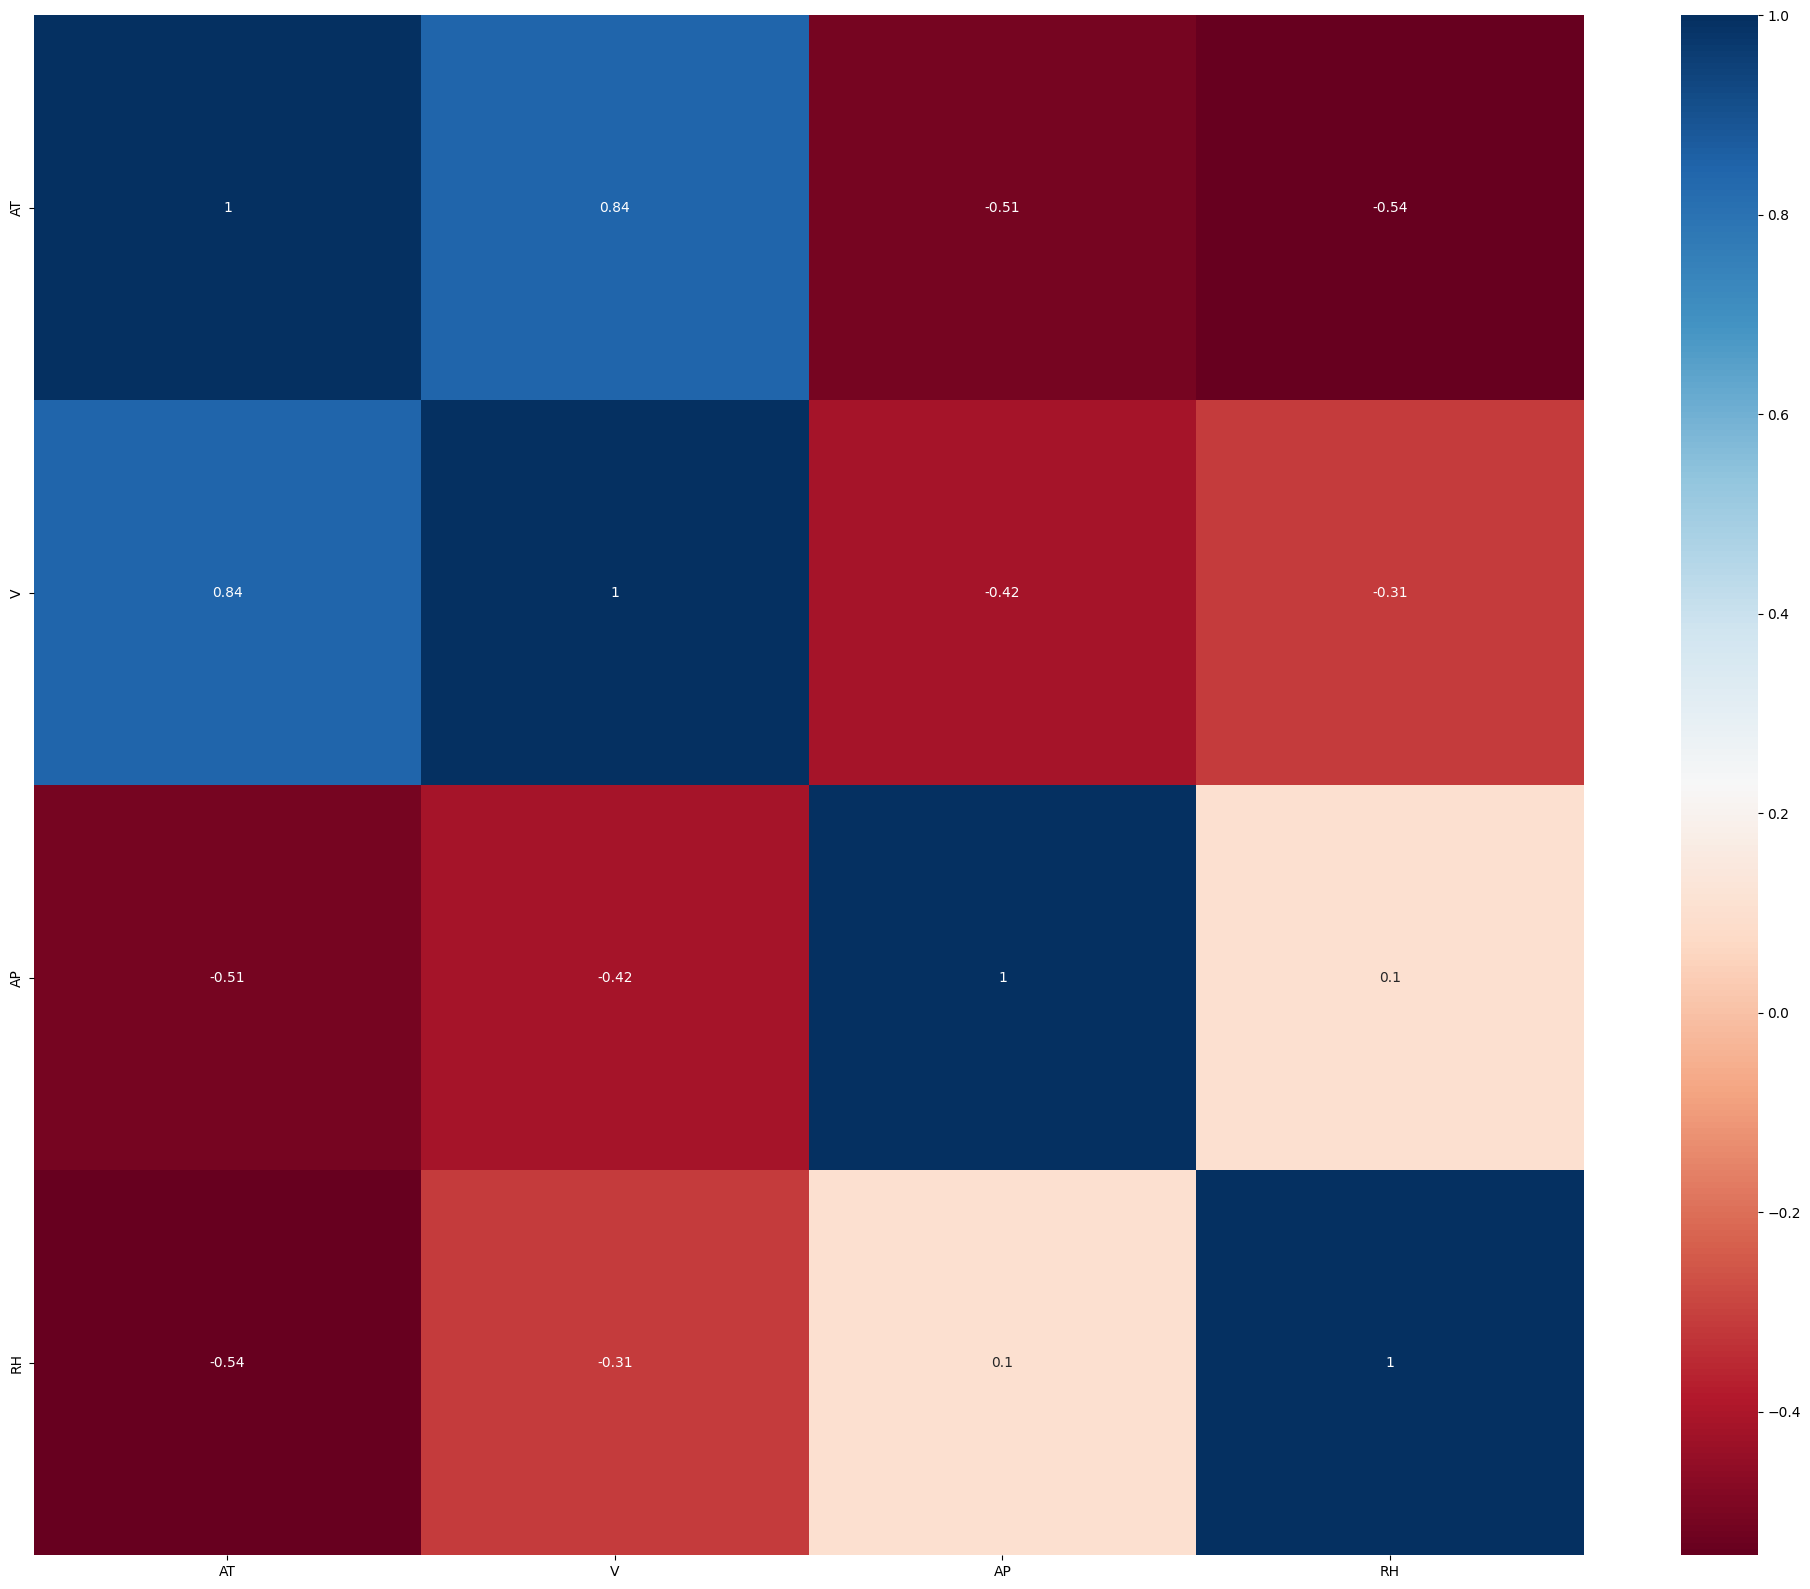

In [10]:
plt.figure(figsize = (25,20))
sns.heatmap(X_dup.corr(), annot = True, cmap="RdBu")
plt.show()

In [11]:
pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
reg = LinearRegression()

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_dup, y_dup, train_size = 0.60, test_size = 0.40, random_state = 42)

pipe.fit(X_train, y_train)
results = pipe.score(X_test, y_test)
print(results)

y_pred = pipe.predict(X_test)
print(y_test)

0.927349497249598
1087    463.57
6328    441.31
8048    445.34
9524    465.42
4465    439.06
         ...  
7337    435.87
9471    446.05
4270    442.62
864     469.80
7358    446.29
Name: PE, Length: 3811, dtype: float64


In [12]:
print(y_pred.shape)

(3811,)


In [13]:
import joblib
joblib.dump(pipe, '/content/drive/MyDrive/Datasets/model_final.pckl')

['/content/drive/MyDrive/Datasets/model_final.pckl']

21.336416555052335 3.6486042943045205 0.927349497249598 4.619135910000088


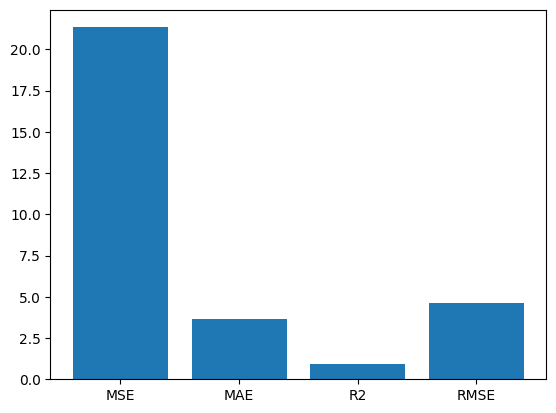

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mse)

print(mse, mae, r2, rmse)
data = {
    'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse
}
types = list(data.keys())
values = list(data.values())
plt.bar(types, values)
plt.show()

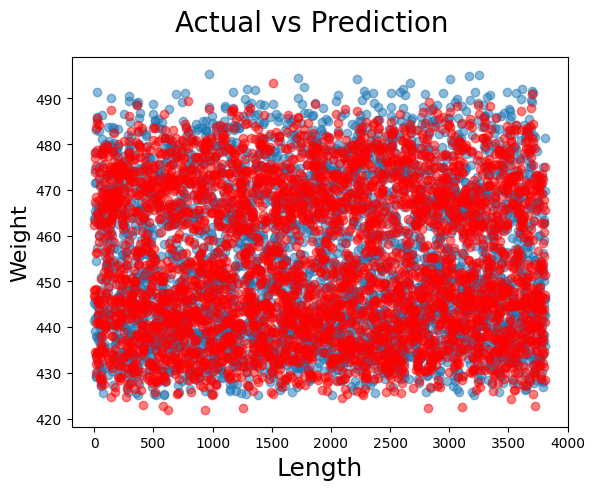

In [15]:
fig = plt.figure()
plt.scatter(range(len(y_test)), y_test, alpha=.5)
plt.scatter(range(len(y_pred)), y_pred, alpha=.5, color = "red")
fig.suptitle('Actual vs Prediction', fontsize = 20)              # Plot heading
plt.xlabel('Length', fontsize = 18)                          # X-label
plt.ylabel('Weight', fontsize = 16)
plt.show()

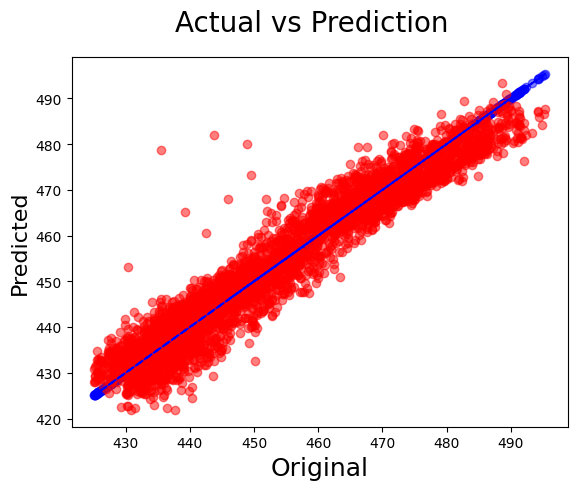

In [16]:
fig = plt.figure()
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted')
fig.suptitle('Actual vs Prediction', fontsize = 20)              # Plot heading
plt.xlabel('Original', fontsize = 18)                          # X-label
plt.ylabel('Predicted', fontsize = 16)
plt.plot(y_test, y_test, color='blue', linestyle='--')
plt.show()

In [18]:
reg = joblib.load('/content/drive/MyDrive/Datasets/model_final.pckl')
print(reg.score(X_test, y_test))

0.927349497249598
